# **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [264]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


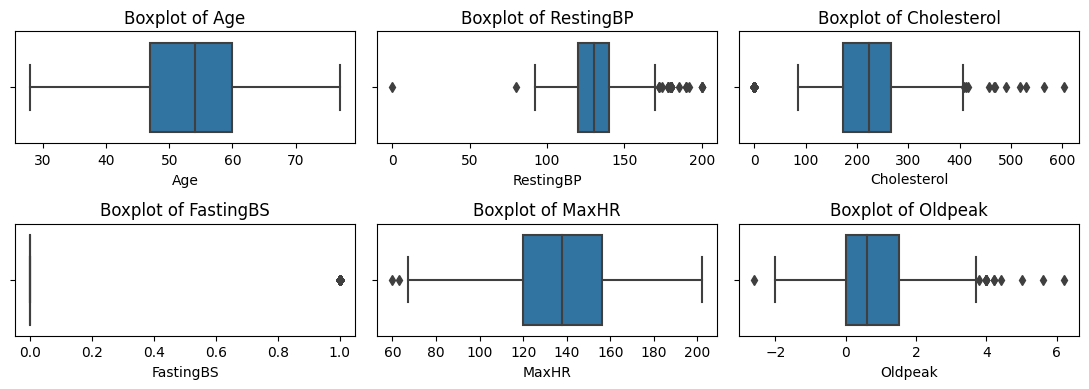

In [265]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
exclude_columns = ['HeartDisease']
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

num_columns = len(numeric_columns)
num_rows = int(np.ceil(num_columns / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(11, 2 * num_rows))

for i, column in enumerate(numeric_columns):
    row_idx = i // 3
    col_idx = i % 3
    sns.boxplot(x=data[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [266]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

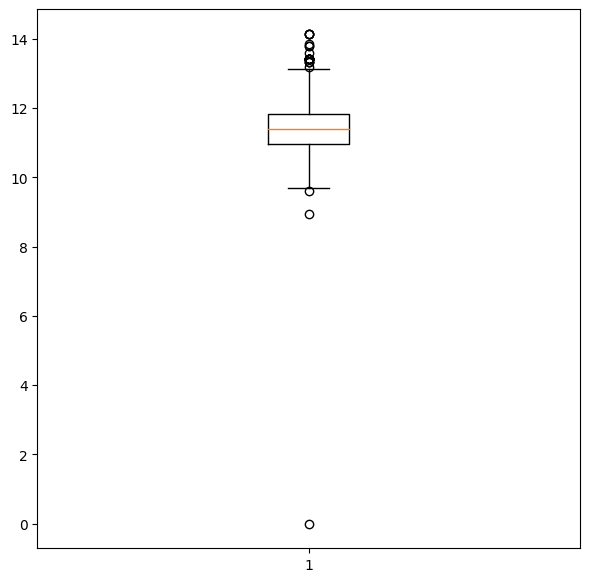

In [267]:
data['new_RestingBP'] = [np.sqrt(x) for x in data['RestingBP']]
fig = plt.figure(figsize =(7, 7))
plt.boxplot(data['new_RestingBP'])
plt.show()

data.rename(columns={'new_RestingBP': 'RestingBP'}, inplace=True)

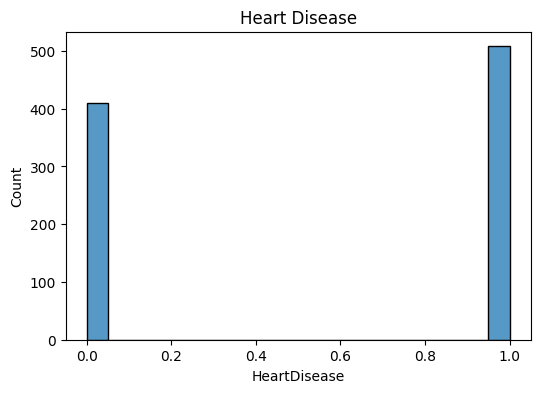

In [268]:
# Visualize the target variable
plt.figure(figsize=(6, 4))
sns.histplot(data['HeartDisease'], bins=20)
plt.title('Heart Disease')
plt.show()

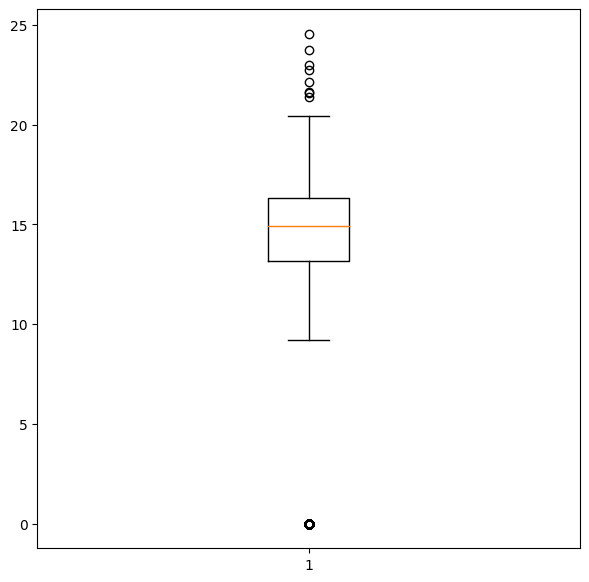

In [269]:
data['new_Cholesterol'] = [np.sqrt(x) for x in data['Cholesterol']]
fig = plt.figure(figsize =(7, 7))
plt.boxplot(data['new_Cholesterol'])
plt.show()

data.rename(columns={'new_Cholesterol': 'Cholesterol'}, inplace=True)

In [270]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP,Cholesterol
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,11.832160,17.000000
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,12.649111,13.416408
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,11.401754,16.822604
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,11.747340,14.628739
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,12.247449,13.964240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,10.488088,16.248077
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,12.000000,13.892444
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,11.401754,11.445523
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,11.401754,15.362291


In [271]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBP,Cholesterol
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,11.474191,12.622780
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.860384,6.285542
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,10.954451,13.162436
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,11.401754,14.933185
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,11.832160,16.340135
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,14.142136,24.556058


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  RestingBP       918 non-null    float64
 13  Cholesterol     918 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 100.5+ KB


In [273]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
RestingBP         0
Cholesterol       0
dtype: int64

# **Model**

In [274]:
X = data.drop('HeartDisease', axis=1)  # Features
y = data['HeartDisease']  # Target

In [275]:
# Encode categorical columns
X = pd.get_dummies(y, drop_first=True)

In [276]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# separate numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

In [278]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
class LogisticRegressionM:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add a column of ones for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        num_samples, num_features = X.shape
        self.theta = np.zeros(num_features)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / num_samples
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        # Add a column of ones for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= 0.5).astype(int)

In [280]:
model = LogisticRegressionM(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [281]:
# Calculate and print accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0
